Data Preview:
    longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                  41          880           129.0   
1    -122.22     37.86                  21         7099          1106.0   
2    -122.24     37.85                  52         1467           190.0   
3    -122.25     37.85                  52         1274           235.0   
4    -122.25     37.85                  52         1627           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0         322         126         8.3252              452600        NEAR BAY  
1        2401        1138         8.3014              358500        NEAR BAY  
2         496         177         7.2574              352100        NEAR BAY  
3         558         219         5.6431              341300        NEAR BAY  
4         565         259         3.8462              342200        NEAR BAY  

Summary:
           longitude      latitude  housing_median

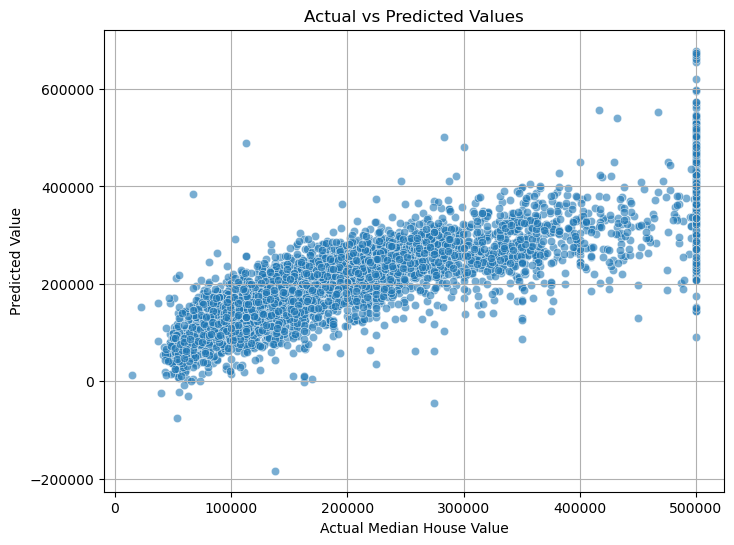

In [2]:
# 📌 Step 1: Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# 📌 Step 2: Load Dataset
df = pd.read_csv('property_data.csv')  # Update path as needed
print("Data Preview:\n", df.head())
print("\nSummary:\n", df.describe())

# 📌 Step 3: Handle Missing Values
print("\nMissing Values:\n", df.isnull().sum())
df.dropna(inplace=True)

# 📌 Step 4: Encode Categorical Variables (e.g., 'ocean_proximity')
if 'ocean_proximity' in df.columns:
    df = pd.get_dummies(df, columns=['ocean_proximity'], drop_first=True)

# 📌 Step 5: Define Features and Target
X = df.drop(columns=['median_house_value'])  # Features
y = df['median_house_value']                 # Target

# 📌 Step 6: Split the Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 📌 Step 7: Train the Model
model = LinearRegression()
model.fit(X_train, y_train)

# 📌 Step 8: Make Predictions
y_pred = model.predict(X_test)

# 📌 Step 9: Evaluate the Model
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"\n✅ Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"✅ R² Score: {r2:.2f}")

# 📌 Step 10: Visualize Predictions
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
plt.xlabel("Actual Median House Value")
plt.ylabel("Predicted Value")
plt.title("Actual vs Predicted Values")
plt.grid(True)
plt.show()
